In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
bank = pd.read_csv('bank-full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report 

In [10]:
bank.drop(["age"],inplace=True,axis = 1)
bank.drop(["job"],inplace=True,axis = 1)
bank.drop(["marital"],inplace=True,axis = 1)
bank.drop(["day"],inplace=True,axis = 1)
bank.drop(["education"],inplace=True,axis = 1)
bank.drop(["contact"],inplace=True,axis = 1)
bank.drop(["month"],inplace=True,axis = 1)
bank.drop(["poutcome"],inplace=True,axis = 1)
bank.drop(["pdays"],inplace=True,axis = 1)
bank.drop(["duration"],inplace=True,axis = 1)
bank 


,default,balance,housing,loan,campaign,previous,y
0,no,2143,yes,no,1,0,no
1,no,29,yes,no,1,0,no
2,no,2,yes,yes,1,0,no
3,no,1506,yes,no,1,0,no
4,no,1,no,no,1,0,no
...,...,...,...,...,...,...,...
45206,no,825,no,no,3,0,yes
45207,no,1729,no,no,2,0,yes
45208,no,5715,no,no,5,3,yes
45209,no,668,no,no,4,0,no


In [12]:
bank.describe()

,balance,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,1362.272058,2.763841,0.580323
std,3044.765829,3.098021,2.303441
min,-8019.000000,1.000000,0.000000
25%,72.000000,1.000000,0.000000
50%,448.000000,2.000000,0.000000
75%,1428.000000,3.000000,0.000000
max,102127.000000,63.000000,275.000000


In [13]:
bank = bank.replace('yes', '1', regex=True) 
bank = bank.replace('no','0',regex=True)
bank 

,default,balance,housing,loan,campaign,previous,y
0,0,2143,1,0,1,0,0
1,0,29,1,0,1,0,0
2,0,2,1,1,1,0,0
3,0,1506,1,0,1,0,0
4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
45206,0,825,0,0,3,0,1
45207,0,1729,0,0,2,0,1
45208,0,5715,0,0,5,3,1
45209,0,668,0,0,4,0,0


In [14]:
bank.isnull().sum()

default     0
balance     0
housing     0
loan        0
campaign    0
previous    0
y           0
dtype: int64

In [15]:
BANK = pd.crosstab(bank.y,bank.loan)
BANK 

loan,0,1
y,,
0,33162,6760
1,4805,484


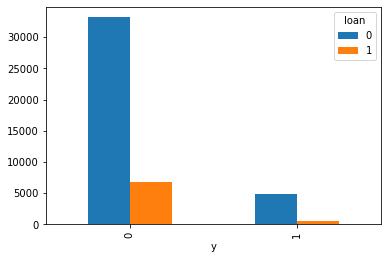

In [16]:
pd.crosstab(bank.y,bank.loan).plot(kind='bar')

In [17]:
from sklearn.linear_model import LogisticRegression
bank.shape 

(45211, 7)

In [18]:
X = bank.iloc[:,[1,2,3,4]]
Y = bank.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y) 

LogisticRegression()

In [19]:
classifier.coef_

array([[-0.00221271, -0.40682836,  0.69010449,  0.02010558]])

In [20]:
classifier.predict_proba (X)

array([[9.99809861e-01, 1.90139446e-04],
       [9.79962304e-01, 2.00376962e-02],
       [9.58514917e-01, 4.14850831e-02],
       ...,
       [9.99999886e-01, 1.14338367e-07],
       [9.92129046e-01, 7.87095446e-03],
       [9.99953348e-01, 4.66518826e-05]])

In [21]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank  

,default,balance,housing,loan,campaign,previous,y,y_pred
0,0,2143,1,0,1,0,0,0
1,0,29,1,0,1,0,0,0
2,0,2,1,1,1,0,0,0
3,0,1506,1,0,1,0,0,0
4,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
45206,0,825,0,0,3,0,1,0
45207,0,1729,0,0,2,0,1,0
45208,0,5715,0,0,5,3,1,0
45209,0,668,0,0,4,0,0,0


In [22]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df

,default,balance,housing,loan,campaign,previous,y,y_pred,0,1
0,0,2143,1,0,1,0,0,0,0.999810,1.901394e-04
1,0,29,1,0,1,0,0,0,0.979962,2.003770e-02
2,0,2,1,1,1,0,0,0,0.958515,4.148508e-02
3,0,1506,1,0,1,0,0,0,0.999222,7.779517e-04
4,0,1,0,0,1,0,0,0,0.968358,3.164206e-02
...,...,...,...,...,...,...,...,...,...,...
45206,0,825,0,0,3,0,1,0,0.994536,5.463569e-03
45207,0,1729,0,0,2,0,1,0,0.999272,7.279370e-04
45208,0,5715,0,0,5,3,1,0,1.000000,1.143384e-07
45209,0,668,0,0,4,0,0,0,0.992129,7.870954e-03


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[44363    33]
 [  798    17]]


In [24]:
pd.crosstab(y_pred,Y) 

default,0,1
row_0,,
0,44363,798
1,33,17


In [25]:
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy

0.9816195173740904

In [26]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44396
           1       0.34      0.02      0.04       815

    accuracy                           0.98     45211
   macro avg       0.66      0.51      0.52     45211
weighted avg       0.97      0.98      0.97     45211



In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.5100577927486973

In [33]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 
y_prob1

,0
0,1.901394e-04
1,2.003770e-02
2,4.148508e-02
3,7.779517e-04
4,3.164206e-02
...,...
45206,5.463569e-03
45207,7.279370e-04
45208,1.143384e-07
45209,7.870954e-03
